## 차원 축소

!! 이 파일에 작성하지 마시고 복제해서 써주세요 !!

실습 과정을 따라하면서 빈칸을 채워주세요 :)

#### 1. PCA

In [1]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# 2. 데이터 불러오기 및 정규화
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

🔎 Quiz 1: PCA 진행 시 왜 스케일링 할까요?

답: 데이터의 단위가 다르면 스케일의 큰 변수가 분산을 지배하게 되므로 각 특성을 평균 0, 표준편차 1로 맞춰서 공정하게 주성분을 찾아야 합니다. 

In [4]:
# 3. PCA 적용
# 기존의 4차원 데이터를 2차원 데이터로 축소해주세요.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


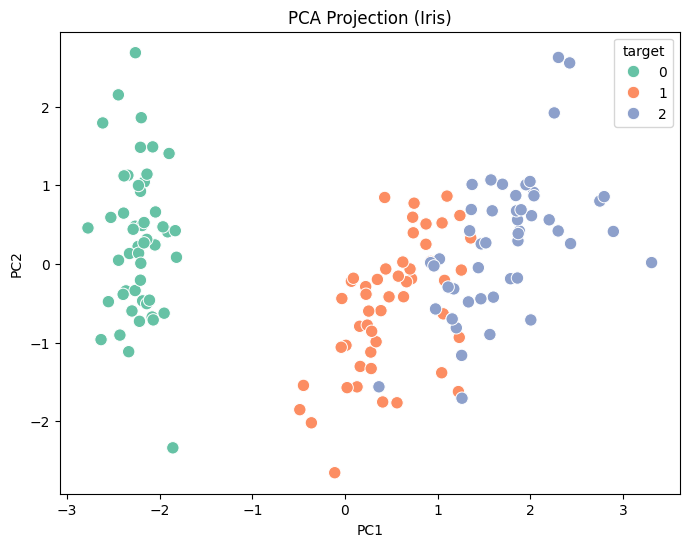

In [5]:
# 4. 시각화
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["target"] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="target", palette="Set2", s=80)
plt.title("PCA Projection (Iris)")
plt.show()

Explained variance ratio: [0.72962445 0.22850762]
누적 설명력: [0.72962445 0.95813207]


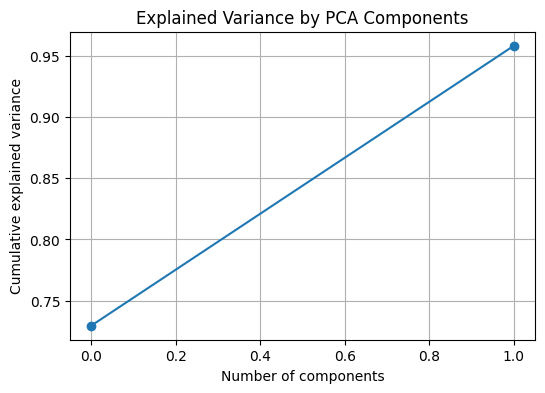

In [6]:
# 5. 분산 설명력 확인
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("누적 설명력:", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

🔎 Quiz 2: 각 주성분이 전체 분산의 몇 %를 설명하는지 써주세요.

답: 각각 전체 변동의 약 72.96%를 설명하고 추가로 22.85% 설명하기 때문에 누적으로는 약 95.81%를 설명한다. 

#### 2. LDA

In [7]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [8]:
# 2. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 정규화 (LDA는 필수는 아니지만 일반적으로 적용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# 3. LDA 적
# LDA는 n_classes - 1 개의 축만 생성 가능합니다. (iris는 3개의 클래스를 가지고 있습니다.)
# 2개의 축으로 설정해주세요.

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_lda.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


🔎 Quiz 3: 왜 LDA는 n_classes - 1개의 축만 생성될까요?

답: LDA는 클래스 간 분산을 최대로 하고 클래스 내 분산을 최소화하는 축을 찾기 때문이다. 

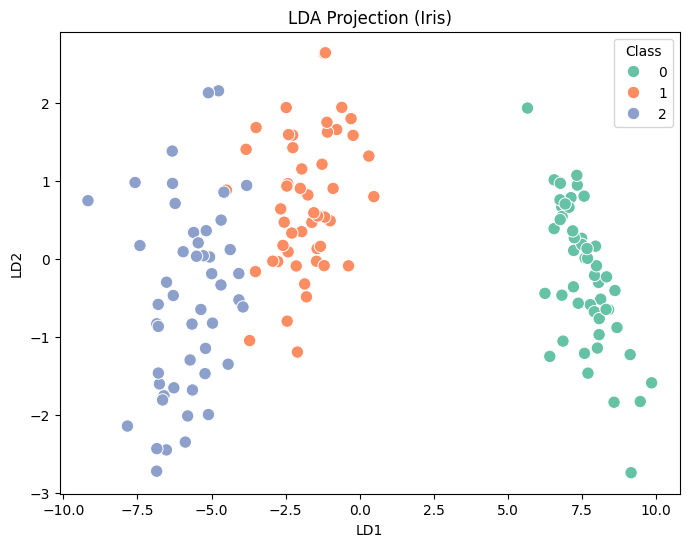

In [10]:
# 4. 시각화
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['target'] = y


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_lda, x='LD1', y='LD2', hue='target', palette='Set2', s=80)
plt.title("LDA Projection (Iris)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title='Class')
plt.show()

#### 3. t-SNE / UMAP

In [16]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap  

In [18]:
# 2. 데이터 로딩 및 스케일링
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 이전에 사용했던 방식으로 표준화를 진행해주세요.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

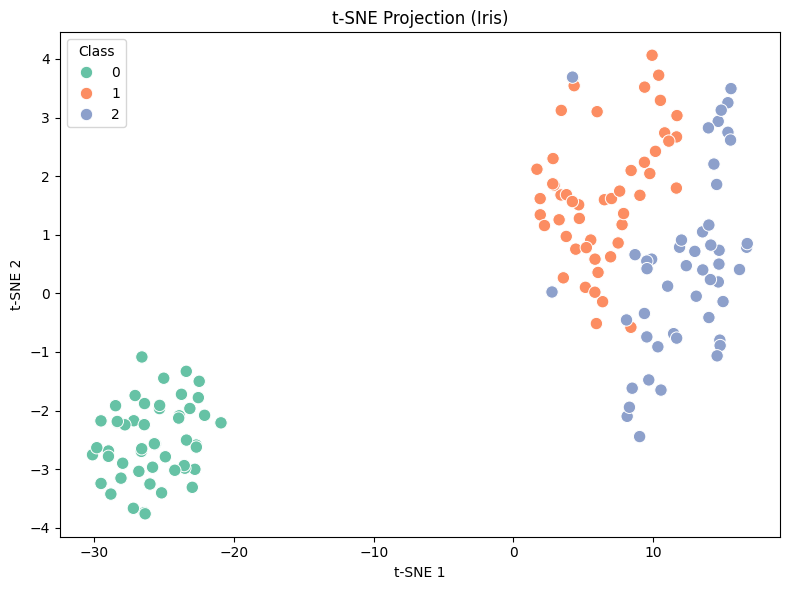

In [20]:
# t-SNE 적용
# 2차원으로 축소해주세요.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# 시각화
df_tsne = pd.DataFrame(X_tsne, columns=["x", "y"])
df_tsne['target'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="target", palette="Set2", s=80)
plt.title("t-SNE Projection (Iris)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()

In [23]:
# UMAP 적용
# 2차원으로 축소해주세요.
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 시각화
df_umap = pd.DataFrame(X_umap, columns=["x", "y"])
df_umap['target'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_umap, x="x", y="y", hue="target", palette="Set2", s=80)
plt.title("UMAP Projection (Iris)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()

TypeError: check_array() got an unexpected keyword argument 'ensure_all_finite'

🔎 Quiz 4: 각 기법의 특징과 시각화 결과를 비교해주세요.

답: PCA는 선형 변환 기반으로 데이터의 분산을 가장 잘 설명하는 직교 축을 찾아 투영하므로 비교적 직선적인 분포로 나타고, 클래스 간 구분이 뚜렷하지 않을 수 있다. LDA는 클래스 간 분산을 최대화하고 클래스 내 분산을 최소화하는 축을 사용하므로 클래스 구분이 잘 드러나는 시각화를 제공한다. t-SNE는 비선형 차원 축소 방법으로 고차원 공간에서 가까운 점들이 저차원에서도 가깝게 유지되도록 매핑하므로, 시각적으로 클래스 간 경계가 뚜렷하게 나타난다. UMAP은 시각화 결과에서 군집 간 거리 정보도 어느 정도 보존된다. 